In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
from datetime import timedelta
import matplotlib.pyplot as plt
%matplotlib inline

accuracy = pd.read_csv("./Accuracy Revised.csv")

In [3]:
accuracy.head()

,Date,QBO,QBSE,Mint
0,1-Jan-18,0.541773,0.562901,NaN
1,2-Jan-18,0.555210,0.615290,NaN
2,3-Jan-18,0.559857,0.646905,NaN
3,4-Jan-18,0.545718,0.557536,NaN
4,5-Jan-18,0.539705,0.568850,NaN


In [4]:
accuracy.describe()

,QBO,QBSE,Mint
count,478.000000,476.000000,306.000000
mean,0.634876,0.630418,0.971331
std,0.085931,0.099211,0.008695
min,0.363974,0.318323,0.954104
25%,0.565354,0.615173,0.964081
50%,0.644821,0.669324,0.968719
75%,0.709912,0.682226,0.979515
max,0.776034,0.772107,0.993386


In [5]:
accuracy.dtypes

Date     object
QBO     float64
QBSE    float64
Mint    float64
dtype: object

In [6]:
accuracy.shape

(479, 4)

In [7]:
accuracy['Date'] = pd.to_datetime(accuracy.Date)

In [8]:
accuracy = accuracy.set_index('Date')

In [9]:
accuracy.head()

,QBO,QBSE,Mint
Date,,,
2018-01-01,0.541773,0.562901,NaN
2018-01-02,0.555210,0.615290,NaN
2018-01-03,0.559857,0.646905,NaN
2018-01-04,0.545718,0.557536,NaN
2018-01-05,0.539705,0.568850,NaN


Text(0, 0.5, 'Accuracy')

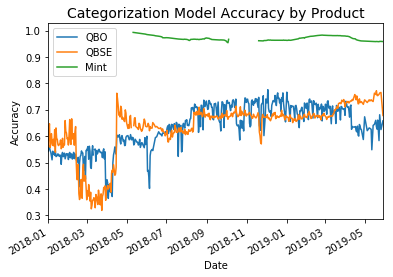

In [10]:
accuracy.plot()
plt.title("Categorization Model Accuracy by Product", fontsize = 14)
plt.ylabel("Accuracy")

In [11]:
accuracy.isna().sum()

QBO       1
QBSE      3
Mint    173
dtype: int64

In [12]:
diff = accuracy['QBO'].diff(periods = 1)

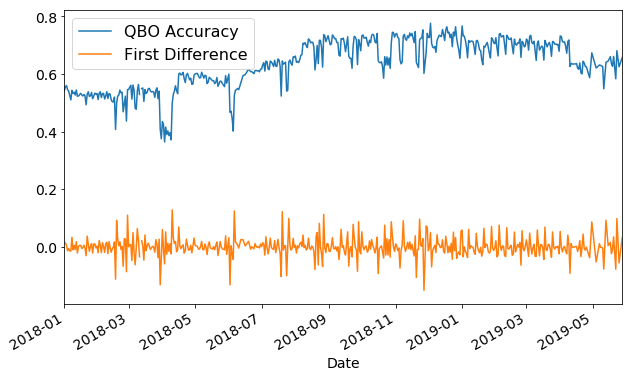

In [14]:
plt.figure(figsize=(10,6))
accuracy['QBO'].plot(legend = True, fontsize=14)
diff.plot(legend = True, fontsize=14)
plt.legend(['QBO Accuracy', 'First Difference'], fontsize=16)
plt.xlabel('Date', fontsize=14)
plt.show()

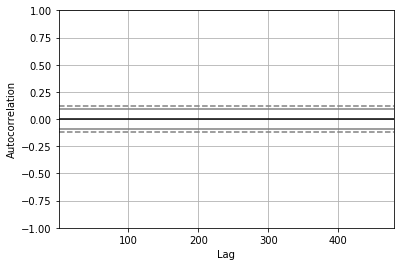

In [27]:
from pandas.plotting import autocorrelation_plot

autocorrelation_plot(accuracy.QBO.values)
plt.show()

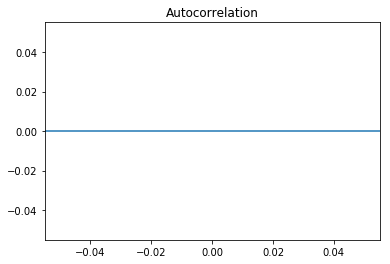

In [24]:
from statsmodels.tsa.stattools import acf
from statsmodels.graphics.tsaplots import plot_acf


plot_acf(accuracy.QBO.values, lags=30)
plt.show()